## DATA SCIENCE - CONCESSIONÁRIA DE VEÍCULOS USADOS
OBJETIVO: ANÁLISAR DADOS DE UMA CONCESSIONÁRIA DE CARROS USADOS, SUAS VENDAS E TENTAR PREVER QUAIS MODELOS PODEM CAUSAR PREJUÍZOS A EMPRESA.

In [1]:
import pandas as pd

In [2]:
# lendo um arquivo excel com Pandas
dataframe = pd.read_excel('carros_usados.xls')

In [3]:
# Visualização das 5 primeiras linhas do Dataframe
dataframe.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


In [4]:
# Acesso as informações do Dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7495 entries, 0 to 7494
Data columns (total 13 columns):
data.set             7495 non-null object
total.cost           7495 non-null int64
lot.sale.days        7495 non-null int64
overage              7495 non-null object
mileage              7495 non-null int64
vehicle.type         7495 non-null object
domestic.import      7495 non-null object
vehicle.age          7495 non-null int64
vehicle.age.group    7495 non-null object
color.set            7495 non-null object
makex                7495 non-null object
state                7495 non-null object
make.model           7495 non-null object
dtypes: int64(4), object(9)
memory usage: 761.3+ KB


In [5]:
# Informações estatísticas das colunas do Dataframe
# Exibe dados apenas das variáveis numéricas.
dataframe.describe()

,total.cost,lot.sale.days,mileage,vehicle.age
count,7495.000000,7495.000000,7495.000000,7495.000000
mean,4980.035490,76.454303,77234.533422,5.567312
std,937.602064,64.644337,17142.552588,1.756219
min,1375.000000,0.000000,1036.000000,1.000000
25%,4354.000000,14.000000,67946.000000,4.000000
50%,4919.000000,73.000000,78534.000000,5.000000
75%,5540.000000,120.000000,89340.000000,7.000000
max,9813.000000,300.000000,119250.000000,12.000000


In [6]:
# Verificando valores nulos no Dataframe (ou Missing Values)
dataframe.isnull().sum()

data.set             0
total.cost           0
lot.sale.days        0
overage              0
mileage              0
vehicle.type         0
domestic.import      0
vehicle.age          0
vehicle.age.group    0
color.set            0
makex                0
state                0
make.model           0
dtype: int64

# Análise exploratória de Dados #

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt

In [9]:
# Definindo estilos para os plots
plt.style.use('ggplot')

<IPython.core.display.Javascript object>


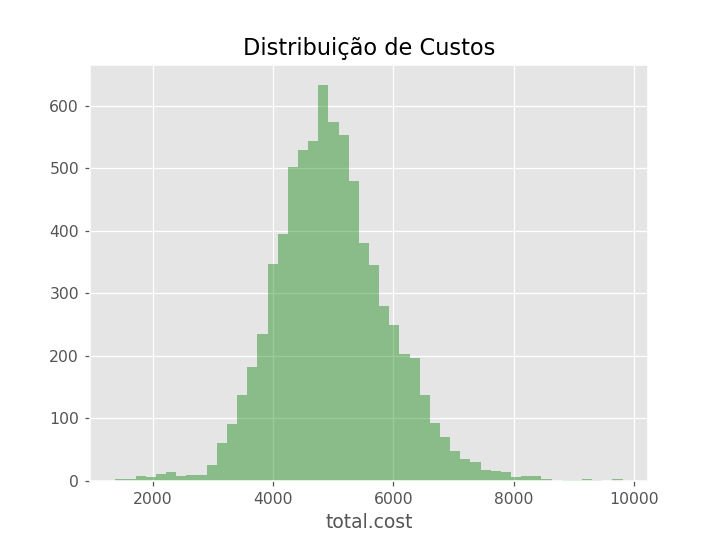

Text(0.5, 1.0, 'Distribuição de Custos')

In [11]:
# Distribuição da variável "total.cost" no gráfico.

# Mantenha o gráfico dentro do Jupyter
%matplotlib notebook
sns.distplot(dataframe['total.cost'],color='green', kde=False)
plt.title('Distribuição de Custos')

# Conclusão:

A maioria dos carros tem um custo para a concessionária de 3k e 6k.

<IPython.core.display.Javascript object>


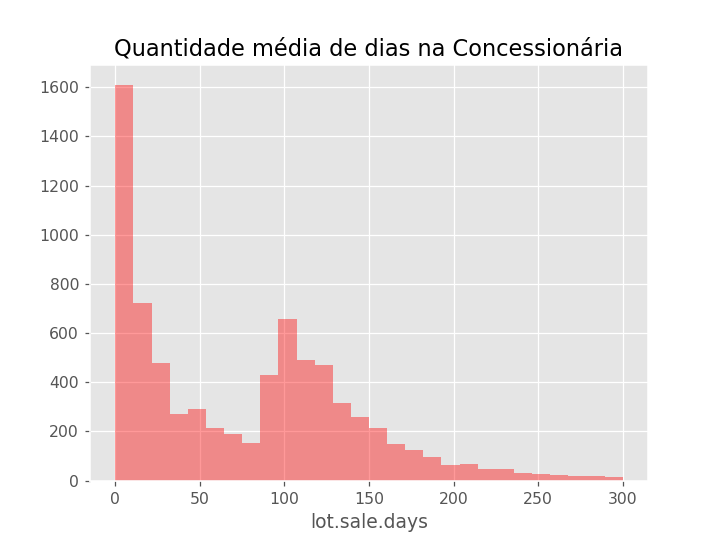

Text(0.5, 1.0, 'Quantidade média de dias na Concessionária')

In [12]:
# Quantidade média de dias que os carros ficam na concessionária

%matplotlib notebook
sns.distplot(dataframe['lot.sale.days'], color='red', kde=False)
plt.title('Quantidade média de dias na Concessionária')

# Conclusão:

• Podemos observar que os dias de vendas são inclinados para o lado esquerdo. Logo, isso nos mostra que a maioria dos carros são vendidos nos primeiros 90 dias.

• Os restantes (20%) são vendidos após 20 dias e são vendidos a preço de desconto.

# Kilometragem média dos carros da concessionária

<IPython.core.display.Javascript object>


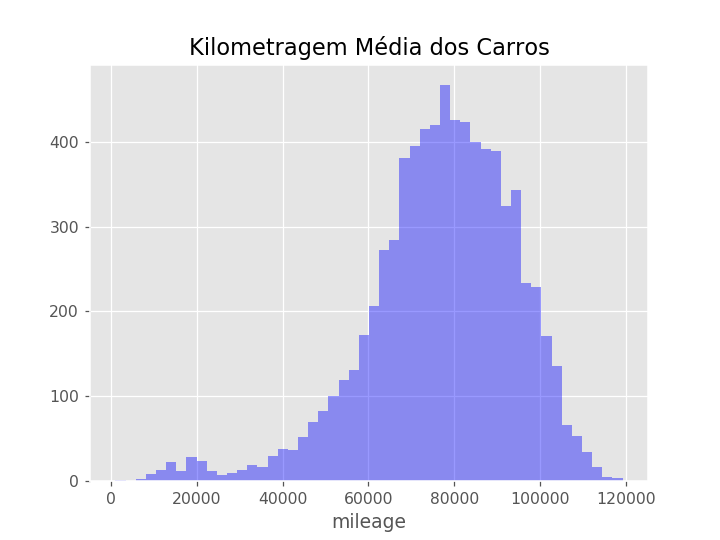

Text(0.5, 1.0, 'Kilometragem Média dos Carros')

In [13]:
%matplotlib notebook
sns.distplot(dataframe['mileage'], color='blue', kde=False)
plt.title('Kilometragem Média dos Carros')

# Conclusão

A grande maioria dos veículos tem faixa de kilometragem entre 60 e 90mil km rodados.

# Idade média dos veículos

<IPython.core.display.Javascript object>


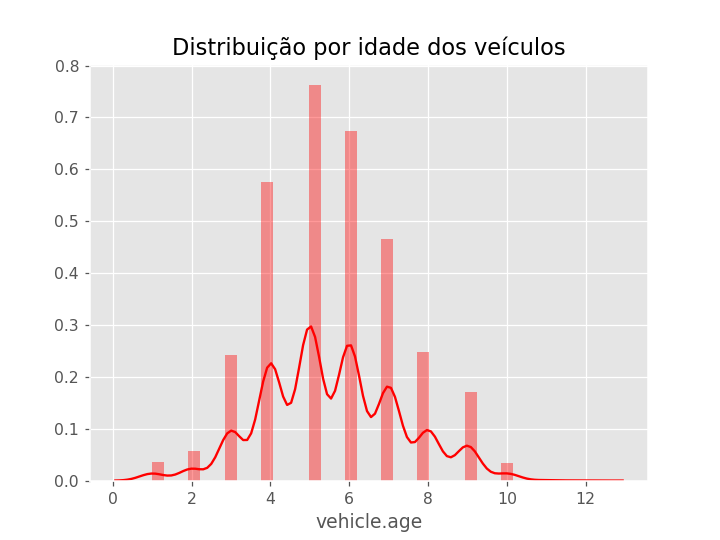

Text(0.5, 1.0, 'Distribuição por idade dos veículos')

In [14]:
%matplotlib notebook
sns.distplot(dataframe['vehicle.age'], color='red', kde=True)
plt.title('Distribuição por idade dos veículos')

# Conclusão

• O tempo médio dos veídulos na concessionária (idade) é de 3 à 7 anos.

# Correlação entre Variáveis

In [15]:
dataframe[['mileage', 'vehicle.age', 'lot.sale.days', 'total.cost']].head()

,mileage,vehicle.age,lot.sale.days,total.cost
0,67341,8,135,4037
1,72823,6,114,6886
2,96330,9,205,3924
3,58519,4,100,4636
4,99057,4,129,5080


• Calculando Correlação entre das variáveis

In [16]:
dataframe[['mileage', 'vehicle.age', 'lot.sale.days', 'total.cost']].corr()

,mileage,vehicle.age,lot.sale.days,total.cost
mileage,1.000000,0.462838,0.060003,-0.127258
vehicle.age,0.462838,1.000000,0.186480,-0.309716
lot.sale.days,0.060003,0.186480,1.000000,0.167632
total.cost,-0.127258,-0.309716,0.167632,1.000000


In [17]:
correlacoes = dataframe[['mileage', 'vehicle.age', 'lot.sale.days', 'total.cost']].corr()

<IPython.core.display.Javascript object>


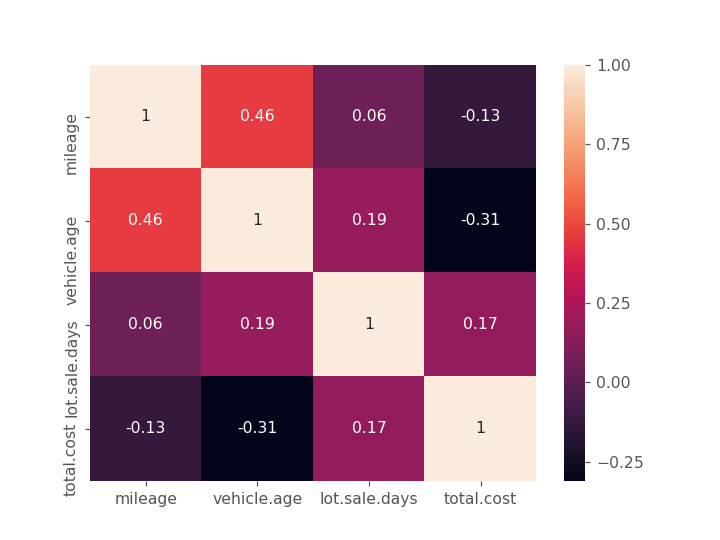

In [18]:
# Plot do mapa de coorlações
# Os valores da coorelação vão de 0 a 1.
# Onde 0 a coorelação é neutra e 1 existe coorelação total.

%matplotlib notebook

# Plot de gráfico de calor.
sns.heatmap(correlacoes, annot=True)

# Conslusão

• O gráfico de calos acima mostra que não existe correlação forte das variáveis com a quantidade de dias de vendas;

• Podemos ver que a kilometragem tem uma correlação positiva com a idade do veículo;

• Podemos ver que os dias de venda tem uma correlação positiva com o custo total do veículo e com a idade do veículo.


# Visualizando a disperssão entre os dias de vendas

<IPython.core.display.Javascript object>


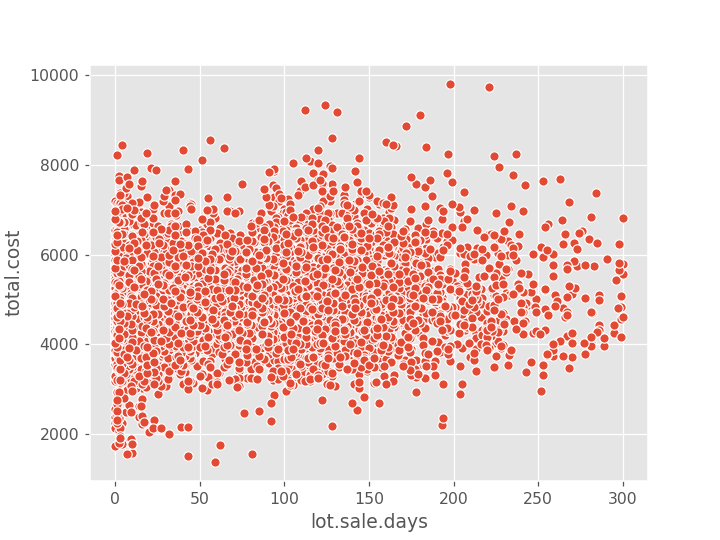

In [19]:
%matplotlib notebook

sns.scatterplot(x='lot.sale.days', y='total.cost', data=dataframe)

<IPython.core.display.Javascript object>


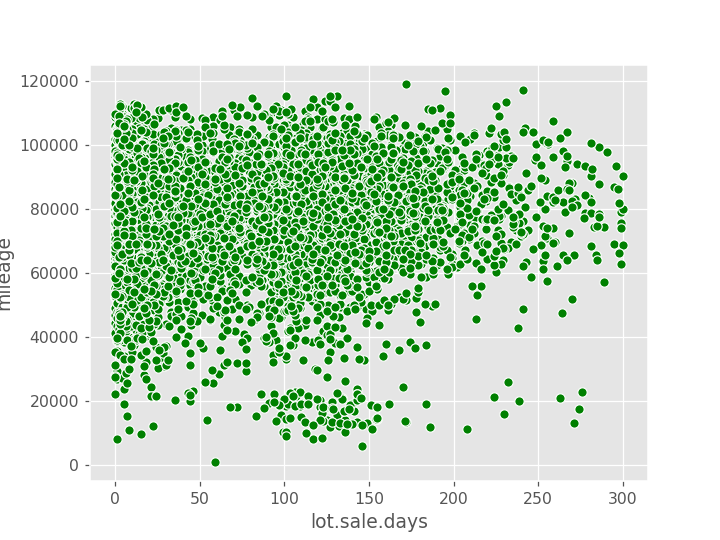

In [20]:
%matplotlib notebook

sns.scatterplot(x='lot.sale.days', y='mileage', color='green', data=dataframe)

# Tempo médio de vendas por categoria de veículos.

<IPython.core.display.Javascript object>


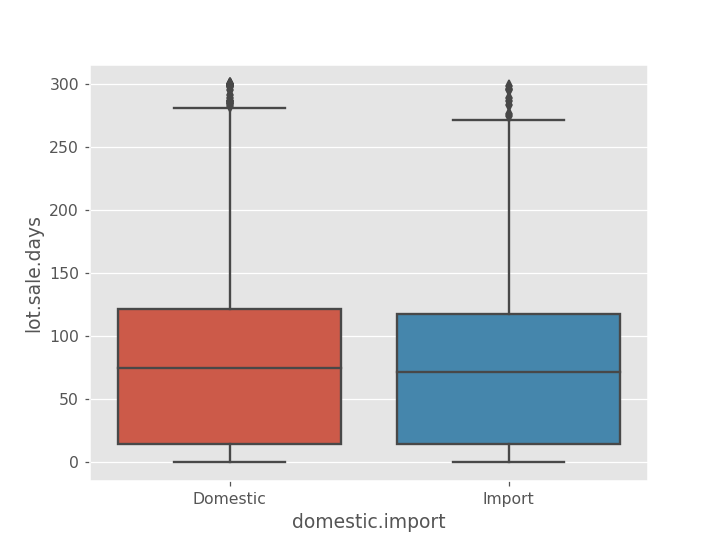

In [21]:
%matplotlib notebook

sns.boxplot(x='domestic.import', y='lot.sale.days', data=dataframe)

# Gráfico mostra os valores máximos, mínimos e os dados mais distantes da maioria dos dados.
# Demosntra, também, a mediana entre os veículos.

<IPython.core.display.Javascript object>


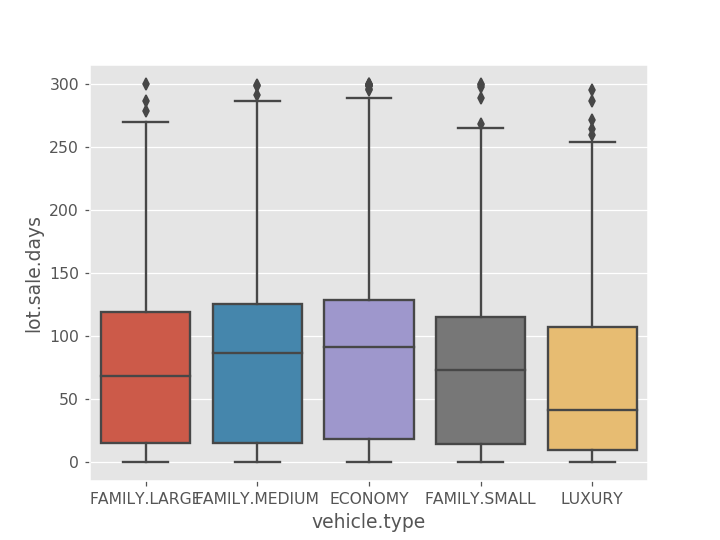

In [22]:
%matplotlib notebook

sns.boxplot(x='vehicle.type', y='lot.sale.days', data=dataframe)

# Conclusões:

• Não existem diferenças entre veículos domésticos e veículos importados em termos de quão rápido eles são vendidos;

• Veículos econônimos demoram um pouco mais para serem vendidos se comparados com veículos de família ou de luxo, por exemplo;

• Em média leva-se 90 dias para vender veículos econômicos, 84 dias para vender veículos de família e 40 dias para vender veículos de luxo.

# Tempo médio de vendas por cor de Veículos

<IPython.core.display.Javascript object>


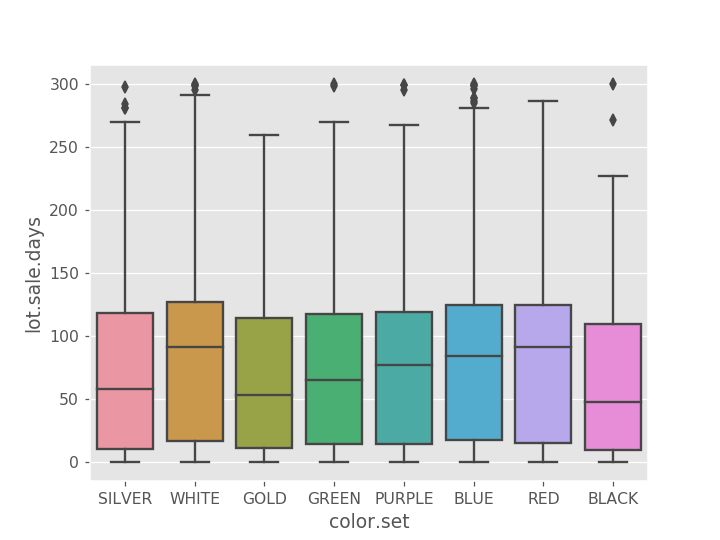

In [23]:
%matplotlib notebook
sns.boxplot(x='color.set', y='lot.sale.days', data=dataframe)

# Conclusões:

• Podemos observar que nesse gráfico que em média os carros que saem mais rápido são carros pretos.

• Em segundo lugar os carros que são vendidos mais rápido são os dourados com 53 dias.

• Por fim os carros que demoram mais para serem vendidos são os carros brancos com 90 dias.

# Tempo médio de vendas por marca de Veículos

<IPython.core.display.Javascript object>


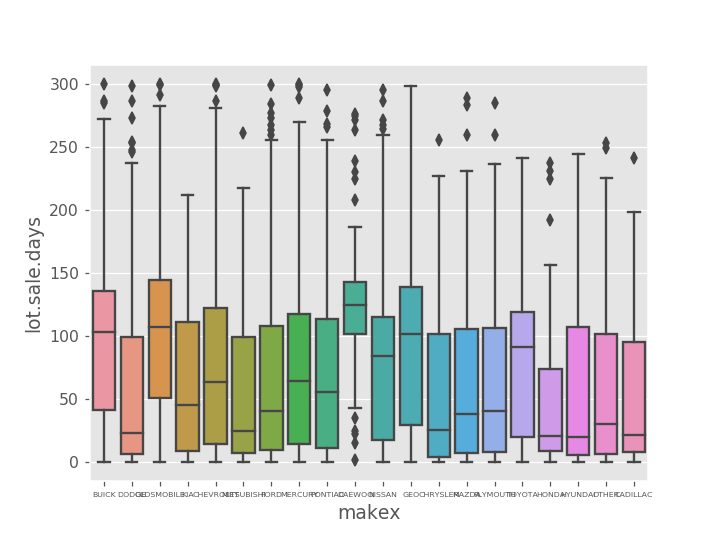

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

In [24]:
%matplotlib notebook
sns.boxplot(x='makex', y='lot.sale.days', data=dataframe)
plt.xticks(size=5)

# Conclusões

• Marcas tem uma grande diferença no tempo de venda de veículos.

• Algumas marcas de veículos que vendem rápido tendem a ser da Honda, Chrysler, Dodge, Hyundai, Plymouth.

• As marcas Daewoo, Oldsmobile, Buick e GEO permanecem por mais tempo antes de serem vendidos.

# Tempo médio de vendas por Estado

<IPython.core.display.Javascript object>


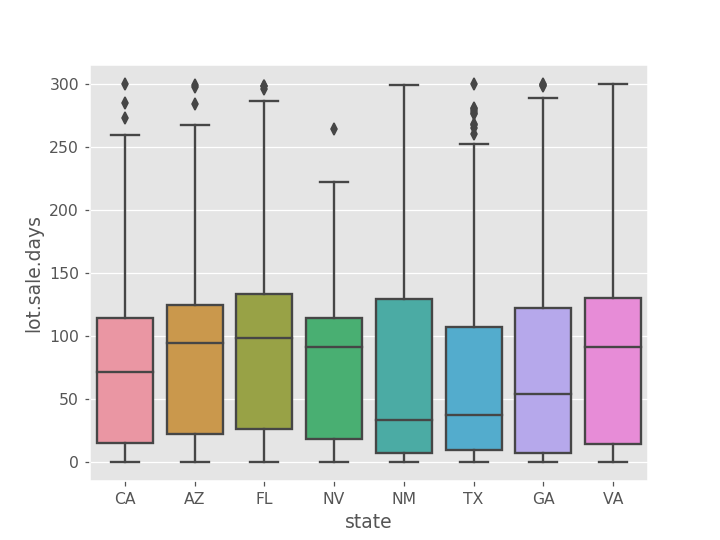

In [25]:
%matplotlib notebook
sns.boxplot(x='state', y='lot.sale.days', data=dataframe)

# Conclusão:

• Alguns estados como California, Georgia e Texas tem diferença significativa de dias para serem vendidos se comparado com Florida, Arizona e Nevada.

# Modelo de machine Learning

In [26]:
dataframe.head()

,data.set,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,vehicle.age.group,color.set,makex,state,make.model
0,TRAIN,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SEVEN+,SILVER,BUICK,CA,BUICK.CENTURY
1,TRAIN,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,SIX,WHITE,DODGE,AZ,DODGE.NEON
2,TRAIN,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,SEVEN+,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,TRAIN,4636,100,YES,58519,ECONOMY,Import,4,FOUR,GOLD,KIA,NV,KIA.SEPHIA
4,TRAIN,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,FOUR,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


In [27]:
# Removendo a coluna vehicle.age.group

dataframe.drop('vehicle.age.group', axis=1, inplace=True)

In [28]:
dataframe.drop('data.set', axis=1, inplace=True)

In [29]:
dataframe.head()

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,135,YES,67341,FAMILY.LARGE,Domestic,8,SILVER,BUICK,CA,BUICK.CENTURY
1,6886,114,YES,72823,FAMILY.MEDIUM,Domestic,6,WHITE,DODGE,AZ,DODGE.NEON
2,3924,205,YES,96330,FAMILY.MEDIUM,Domestic,9,WHITE,OLDSMOBILE,FL,OLDSMOBILE.CUTLASS SUPREME
3,4636,100,YES,58519,ECONOMY,Import,4,GOLD,KIA,NV,KIA.SEPHIA
4,5080,129,YES,99057,FAMILY.MEDIUM,Domestic,4,GREEN,OLDSMOBILE,NV,OLDSMOBILE.CUTLASS SUPREME


In [30]:
# aplicando o LabelEncoder para codificação de variáveis categóricas
from sklearn.preprocessing import LabelEncoder

In [31]:
label_encoder1 = LabelEncoder()
label_encoder2 = LabelEncoder()
label_encoder3 = LabelEncoder()
label_encoder4 = LabelEncoder()
label_encoder5 = LabelEncoder()
label_encoder6 = LabelEncoder()

In [32]:
# Cada coluna vai receber ela mesma codificada para o modelo.

dataframe['vehicle.type'] = label_encoder1.fit_transform(dataframe['vehicle.type'])
dataframe['domestic.import'] = label_encoder2.fit_transform(dataframe['domestic.import'])
dataframe['color.set'] = label_encoder3.fit_transform(dataframe['color.set'])
dataframe['makex'] = label_encoder4.fit_transform(dataframe['makex'])
dataframe['state'] = label_encoder5.fit_transform(dataframe['state'])
dataframe['make.model'] = label_encoder6.fit_transform(dataframe['make.model'])

In [33]:
dataframe.head()

,total.cost,lot.sale.days,overage,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,135,YES,67341,1,0,8,6,0,1,1
1,6886,114,YES,72823,2,0,6,7,5,0,33
2,3924,205,YES,96330,2,0,9,7,15,2,77
3,4636,100,YES,58519,0,1,4,2,10,5,54
4,5080,129,YES,99057,2,0,4,3,15,5,77


In [34]:
# Separando a coluna para treinar o algoritmo.
y = dataframe['overage']

In [35]:
y.head()

0    YES
1    YES
2    YES
3    YES
4    YES
Name: overage, dtype: object

In [36]:
# Apagar coluna "overage" e a coluna "lot.days.sales"

x = dataframe.drop(['lot.sale.days', 'overage'], axis=1)

In [37]:
x.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
0,4037,67341,1,0,8,6,0,1,1
1,6886,72823,2,0,6,7,5,0,33
2,3924,96330,2,0,9,7,15,2,77
3,4636,58519,0,1,4,2,10,5,54
4,5080,99057,2,0,4,3,15,5,77


# Separando dos dados de treino e teste

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# Os dados de treino vão para as variáveis de treino e os testes vão para as variaveis de teste
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y)

In [40]:
X_treino.count()

total.cost         5621
mileage            5621
vehicle.type       5621
domestic.import    5621
vehicle.age        5621
color.set          5621
makex              5621
state              5621
make.model         5621
dtype: int64

In [41]:
y_treino.count()

5621

In [42]:
# Dados sem as classes deles.

X_treino.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
6800,5955,84471,3,1,4,1,19,1,93
572,3851,78486,2,0,8,1,0,0,2
3250,3497,89874,2,0,6,7,15,7,75
4796,6395,57974,2,0,4,5,15,6,72
5020,4306,51995,2,0,4,7,5,0,33


In [43]:
# Respostas do treino
# Resposta da linha 1 = Yes
# Resposta das outras linhas = NO

y_treino.head()

6800     NO
572     YES
3250    YES
4796     NO
5020     NO
Name: overage, dtype: object

In [44]:
X_teste.count()

total.cost         1874
mileage            1874
vehicle.type       1874
domestic.import    1874
vehicle.age        1874
color.set          1874
makex              1874
state              1874
make.model         1874
dtype: int64

In [45]:
y_teste.count()

1874

# Aplicando Machine Learning com Arvore de Decisão

In [46]:
from sklearn import tree

In [47]:
arvore = tree.DecisionTreeClassifier()

In [48]:
# Treinando o algoritmo - Entregando os dados de treino e as respostas
# Com os dados padrões o algoritmo vai aprender
# 75% da base para o treino do algoritmo e 25% para testar posteriormente

arvore.fit(X_treino, y_treino)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Validação do Modelo

In [49]:
X_teste.head()

,total.cost,mileage,vehicle.type,domestic.import,vehicle.age,color.set,makex,state,make.model
1743,4212,84531,2,0,6,2,15,2,72
3726,6161,94064,4,1,4,2,14,3,67
844,4591,73785,2,0,5,3,0,0,6
1768,6503,84818,4,0,7,1,16,6,55
2439,5064,78303,3,0,9,5,0,6,6


In [50]:
# Passando os dados de teste para o algoritmo

resultado = arvore.predict(X_teste)

In [51]:
resultado

array(['YES', 'YES', 'YES', ..., 'NO', 'NO', 'NO'], dtype=object)

In [52]:
from sklearn import metrics

print(metrics.classification_report(y_teste, resultado))

              precision    recall  f1-score   support

          NO       0.66      0.65      0.66      1006
         YES       0.60      0.61      0.61       868

   micro avg       0.63      0.63      0.63      1874
   macro avg       0.63      0.63      0.63      1874
weighted avg       0.63      0.63      0.63      1874



# Conclusão:

• a precisão do modelo é de 62% para classificar carros que superam os 90 dias. Ou seja, podem causar prejuízos a concessionária.

• O modelo pode melhorar se trabalhar mais nos dados, e com um trabalho de engenharia de features.

# Features mais impostantes para o modelo

In [53]:
#Impressão dos pesos das feature do modelo

arvore.feature_importances_

array([0.28942122, 0.2085391 , 0.06441542, 0.01314868, 0.08278183,
       0.08946381, 0.04276669, 0.07736259, 0.13210066])

In [54]:
feature_imp = pd.Series(arvore.feature_importances_, index=X_treino.columns)

In [55]:
feature_imp

total.cost         0.289421
mileage            0.208539
vehicle.type       0.064415
domestic.import    0.013149
vehicle.age        0.082782
color.set          0.089464
makex              0.042767
state              0.077363
make.model         0.132101
dtype: float64

<IPython.core.display.Javascript object>


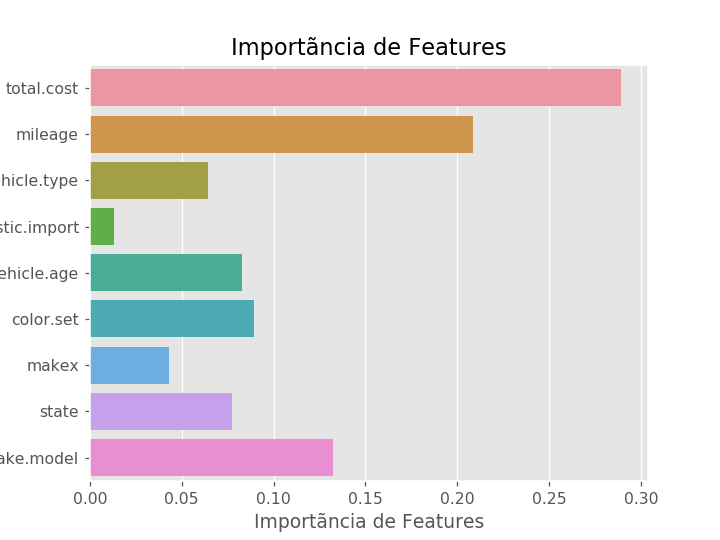

In [56]:
#Visualização das Features mais importantes do Modelo

%matplotlib notebook
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Importãncia de Features')
plt.ylabel('Features')
plt.title('Importãncia de Features')
plt.show()

# Visualizando a Árvore de Decisão

• Instalando Libs para visualização no Jupyter Notebook

In [57]:
import pydot
import graphviz 
from ipywidgets import interactive

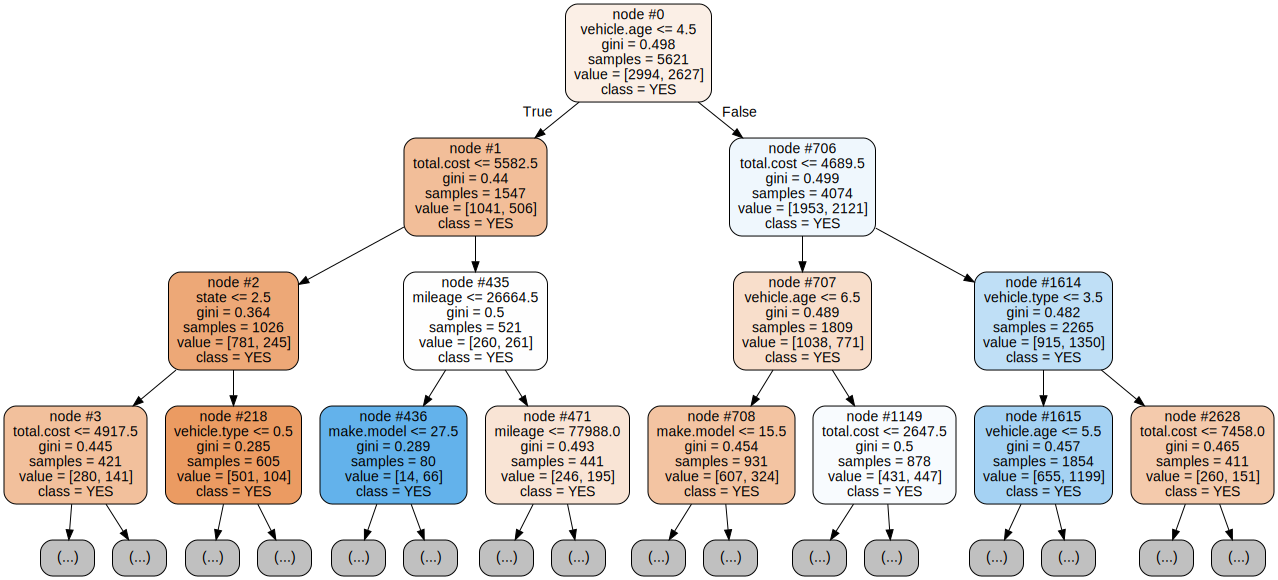

In [58]:
dot_data = tree.export_graphviz(
         arvore,
         feature_names = x.columns,
         class_names = y,
         max_depth = 3, 
         filled = True, 
         rounded = True,
         node_ids = True,
         label='all',
        )  
graph = graphviz.Source(dot_data)  
graph